In [1]:
%pip install pandas
%pip install openpyxl
%pip install seaborn
%pip install vaderSentiment
import pandas as pd 

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


**Analyze whether review is Highly Positive,Positive, Neutral, Highly Negative, Negative.**

In [4]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer # type: ignore

input_file = 'Review_Data.xlsx'
df = pd.read_excel(input_file)
analyzer = SentimentIntensityAnalyzer()
df['Sentiment'] = df['Comment'].apply(
    lambda x: 'Highly Positive' if analyzer.polarity_scores(str(x))['compound'] > 0.75 else
              'Positive' if analyzer.polarity_scores(str(x))['compound'] > 0.5 else
              'Highly Negative' if analyzer.polarity_scores(str(x))['compound'] < -0.75 else
              'Negative' if analyzer.polarity_scores(str(x))['compound'] < -0.5 else
              'Neutral' if isinstance(x, str) else None
)

df.to_excel('Review_Data.xlsx', index=False)

**Sentiment Mapping to Numeric values**

In [5]:
input_file = 'Review_Data.xlsx'
df = pd.read_excel(input_file)
sentiment_mapping = {
    'Highly Positive': 2,
    'Positive': 1,
    'Neutral': 0,
    'Negative': -1,
    'Highly Negative': -2
}

# Apply the mapping to the Sentiment column
df['Numeric_Sentiment'] = df['Sentiment'].map(sentiment_mapping)
df.to_excel('Review_Data.xlsx', index=False)

**Sentiment Distribution Visualization:**

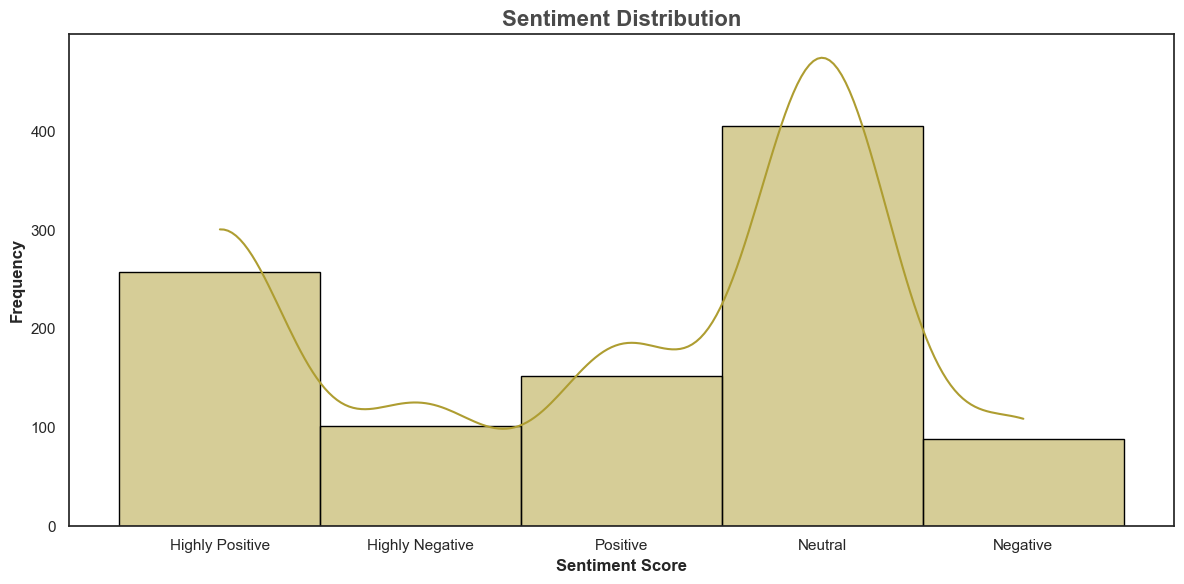

In [6]:
import seaborn as sns # type: ignore
import matplotlib.pyplot as plt # type: ignore
import pandas as pd # type: ignore

# Load the dataset
input_file = 'Review_Data.xlsx'
df = pd.read_excel(input_file)

# Set Seaborn style and palette
sns.set_theme(style="white")  # Use a clean, modern grid
palette = sns.color_palette("husl", 10)  # Vibrant color palette

# Create the plot
plt.figure(figsize=(12, 6))  # Larger figure for better readability
sns.histplot(df['Sentiment'], bins=10, kde=True, color=palette[2], edgecolor='black')

# Customize the plot
plt.title("Sentiment Distribution", fontsize=16, fontweight='bold', color='#4a4a4a')  # Stylish title
plt.xlabel("Sentiment Score", fontsize=12, fontweight='bold')  # Customize x-axis label
plt.ylabel("Frequency", fontsize=12, fontweight='bold')  # Customize y-axis label

# Display the plot
plt.tight_layout()  # Adjusts plot to fit neatly
plt.show()


**Energetic Properties of Ashwagandha (Warming, Cooling, etc.)**

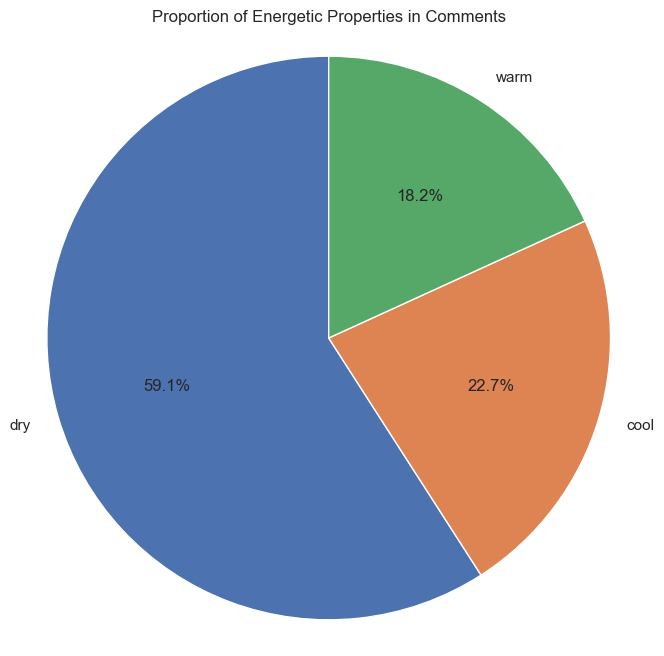

In [7]:
# Count occurrences of specific words
properties_df = pd.read_excel(input_file)
word_counts = properties_df['Cleaned_Reviews'].str.extractall(r'(warm|cool|dry|moist)')[0].value_counts() # type: ignore

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(word_counts, labels=word_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Proportion of Energetic Properties in Comments')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

Analyzing Safety Related Reviews

In [17]:
import pandas as pd
# Load the data
data = pd.read_excel('Review_Data.xlsx')

# Define keywords for safety concerns
safety_keywords = [
    'side effects', 'adverse effects', 'reactions', 'complications', 'symptoms', 'discomfort', 'aftermath', 'impact',
    'safety', 'security', 'harmlessness', 'non-toxic', 'precautions', 'well-being', 'wellness', 'protection',
    'concerns', 'worries', 'issues', 'anxieties', 'problems', 'doubts', 'fears', 'apprehensions', 'reservations',
    'allergy', 'sensitivity', 'intolerance', 'reaction', 'allergic reaction', 'hypersensitivity', 'rash', 'irritation',
    'danger', 'hazard', 'threat', 'risk', 'peril', 'unsafe', 'harm', 'caution', 'warning', 'danger signs',
    'risk', 'exposure', 'potential danger', 'chance', 'threat', 'vulnerability', 'likelihood', 'hazard'
]

# Function to identify safety concerns in comments
def contains_safety_concern(comment):
    if isinstance(comment, str):  # Check if comment is a string
        comment_lower = comment.lower()
        return any(keyword in comment_lower for keyword in safety_keywords)
    return False

# Apply function to find reviews mentioning safety concerns
data['Safety Concern'] = data['Comment'].apply(contains_safety_concern)

# Filter reviews with safety concerns
safety_reviews = data[data['Safety Concern'] == True]

# Calculate the percentage of reviews mentioning safety concerns
total_reviews = len(data)
safety_reviews_count = len(safety_reviews)
percentage_safety_concerns = (safety_reviews_count / total_reviews) * 100

print(f"Total Reviews: {total_reviews}")
print(f"Safety-Related Reviews: {safety_reviews_count}")
print(f"Percentage of Safety-Related Reviews: {percentage_safety_concerns:.2f}%")


Total Reviews: 1006
Safety-Related Reviews: 205
Percentage of Safety-Related Reviews: 20.38%


Visualizing using Pie chart

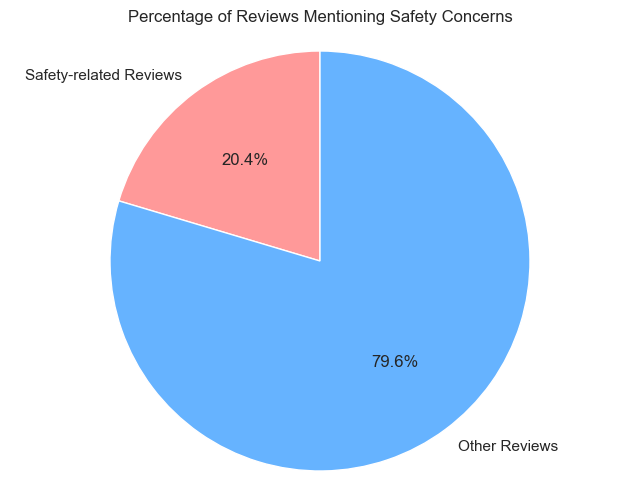

In [18]:
import matplotlib.pyplot as plt # type: ignore

# Data for visualization
labels = ['Safety-related Reviews', 'Other Reviews']
sizes = [safety_reviews_count, total_reviews - safety_reviews_count]
colors = ['#ff9999','#66b3ff']

# Create a pie chart
plt.figure(figsize=(8, 6))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Percentage of Reviews Mentioning Safety Concerns')
plt.show()

Generating a Word Cloud

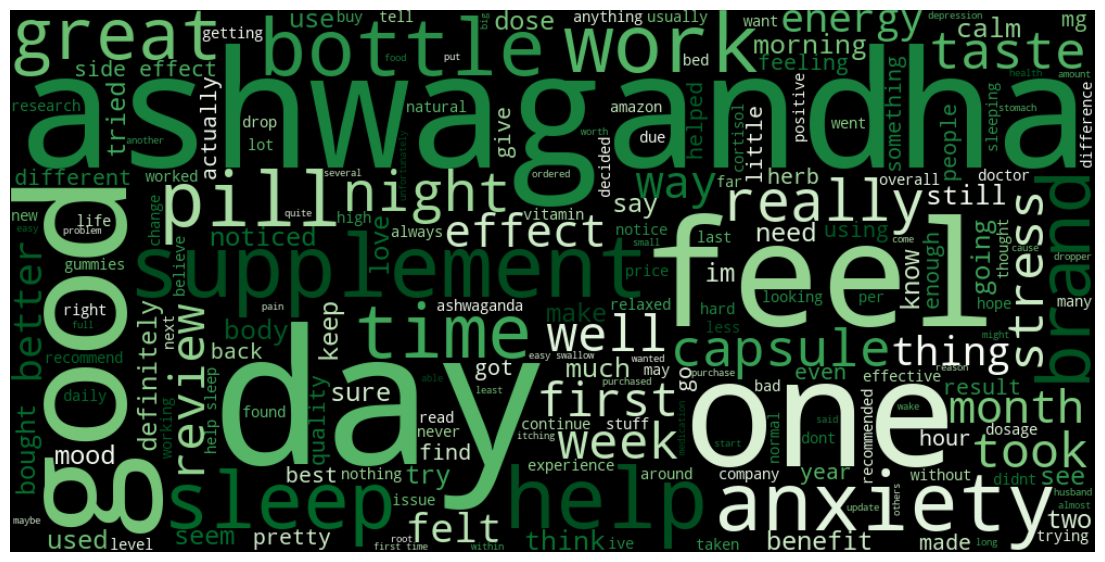

In [15]:
from wordcloud import WordCloud
from wordcloud import STOPWORDS
import matplotlib.pyplot as plt

input_file = 'Review_Data.xlsx'
df = pd.read_excel(input_file)
custom_stopwords = {'having','taking','take','product', 'started'}
all_stopwords = set(STOPWORDS).union(custom_stopwords)
positive_reviews = df[df['Numeric_Sentiment'] > 0.5]
text = ' '.join(positive_reviews['Cleaned_Reviews'].values)
wordcloud = WordCloud(
    width=1000, 
    height=500, 
    max_words=200, 
    stopwords=all_stopwords, 
    background_color='black', 
    colormap='Greens', 
    contour_color='black', 
    contour_width=1
).generate(text)

plt.figure(figsize=(14, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()